## Plot Results of Solving Ising Model using Density Matrix Renormalizaton Group

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import subprocess

In [2]:
def mean_field_energy_density(lmbda):
    if np.abs(lmbda) <= 2:
        return -1 - lmbda ** 2 / 4
    return -np.abs(lmbda)

In [3]:
compiled_dir = f"..{os.sep}compiled"
data_dir = f"..{os.sep}data"
plot_dir = f"..{os.sep}plots"

In [4]:
program = f"{compiled_dir}{os.sep}dmrg_ising"

In [5]:
N = list(range(2, 3))

In [6]:
lam = np.arange(-5, 5.1, 0.1)

In [7]:
gs_energy = np.zeros((len(N), len(lam)))
gs_energy[:] = np.nan

In [8]:
max_iterations = np.zeros((len(N), len(lam)))
max_iterations[:] = np.nan

In [9]:
for i in range(len(N)):
    print(f"Running N = {N[i]} ...")

    for j in range(len(lam)):
        output = subprocess.run(
            [program, "--N", str(N[i]), "--lambda", str(lam[j]), "--max_iter", str(1000), "--thres", str(0.000005)],
            stdout=subprocess.PIPE,
            encoding="ascii"
        )

        results = output.stdout.split("\n")

        did_converge = results[8].split("=")[1].strip()

        if did_converge == "T":
            gs_energy[i, j] = float(results[6].split("=")[1])
            max_iterations[i, j] = int(results[7].split("=")[1])

Running N = 2 ...


In [10]:
max_iterations[0]

array([706., 623., 666., 629., 601., 561., 543., 530., 699., 506., 430.,
       471., 473., 461., 465., 602., 580., 545., 513., 482., 282., 419.,
       257., 239., 214., 216., 177., 171., 145., 133., 122., 112., 214.,
       216.,  43., 239., 134., 105.,  74.,  71.,  71., 157., 106., 149.,
       126., 182., 341., 178.,  27., 202., 125., 150., 180.,  62.,  70.,
       117., 177.,  65., 118.,  99., 116., 116.,  93., 166., 168., 165.,
       100., 172., 119., 134., 139., 159., 174., 180., 197., 223., 219.,
       365., 184., 413., 448., 464., 511., 535., 570., 605., 641., 495.,
       490., 389., 523., 524., 539., 547., 520., 560., 592., 614., 660.,
       687., 746.])

In [11]:
gs_energy[0]

array([-5.0662, -4.968 , -4.8689, -4.7705, -4.6722, -4.5738, -4.4756,
       -4.3773, -4.2777, -4.1809, -4.0834, -3.985 , -3.887 , -3.7893,
       -3.6915, -3.5928, -3.4955, -3.3985, -3.3017, -3.2051, -3.1116,
       -3.0128, -2.9196, -2.8243, -2.7296, -2.6344, -2.5414, -2.4475,
       -2.3554, -2.2633, -2.172 , -2.0816, -1.9846, -1.8957, -1.8273,
       -1.7225, -1.6423, -1.5627, -1.4913, -1.4146, -1.3447, -1.2772,
       -1.2213, -1.1693, -1.1264, -1.0883, -1.0573, -1.0336, -1.0181,
       -1.0041, -1.0004, -1.0043, -1.0154, -1.0355, -1.0592, -1.0889,
       -1.1256, -1.1726, -1.2209, -1.2792, -1.3419, -1.4105, -1.4858,
       -1.5602, -1.641 , -1.7244, -1.8159, -1.897 , -1.9905, -2.0796,
       -2.1706, -2.2615, -2.3537, -2.447 , -2.5404, -2.6342, -2.7294,
       -2.8215, -2.9218, -3.0129, -3.1089, -3.2054, -3.3017, -3.3987,
       -3.4956, -3.5928, -3.6902, -3.789 , -3.8869, -3.9859, -4.0826,
       -4.1807, -4.2789, -4.3772, -4.4757, -4.574 , -4.6721, -4.7706,
       -4.8689, -4.9

In [12]:
mf_gs_energy = [mean_field_energy_density(l) for l in lam]

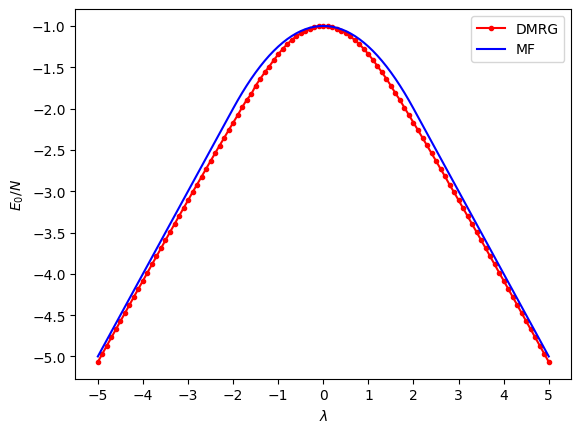

In [13]:
plt.plot(lam, gs_energy[0], "r.-", label="DMRG")
plt.plot(lam, mf_gs_energy, "b-", label="MF")
plt.xlabel("$\lambda$")
plt.ylabel("$E_0/N$")
plt.xticks(np.arange(-5, 6, 1))
plt.legend()

Compare with RSRG.

In [15]:
program_rsrg = f"{compiled_dir}{os.sep}rsrg_ising"

In [16]:
gs_energy_rsrg = np.zeros((len(lam)))

In [18]:
N = 2

In [19]:
for i in range(len(lam)):
    output = subprocess.run(
        [program_rsrg, "--N", str(N), "--lambda", str(lam[i])],
        stdout=subprocess.PIPE,
        encoding="ascii"
    )

    results = output.stdout.split("\n")

    did_converge = results[8].split("=")[1].strip()

    if did_converge == "T":
        gs_energy_rsrg[i] = float(results[6].split("=")[1])

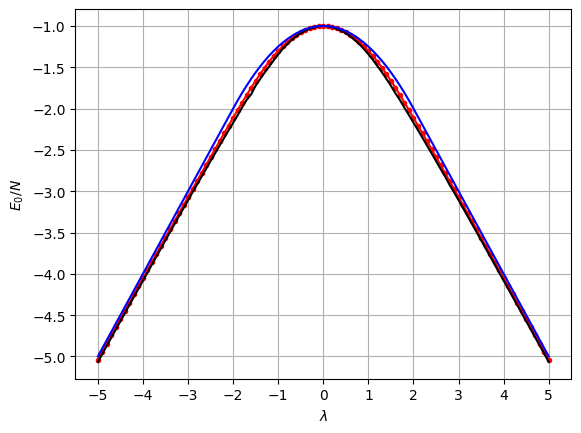

In [26]:
plt.plot(lam, gs_energy_rsrg, "r.-", label="RSRG")
plt.plot(lam, gs_energy[0], "k-", label="DMRG")
plt.plot(lam, mf_gs_energy, "b-", label="MF")
plt.xlabel("$\lambda$")
plt.ylabel("$E_0/N$")
plt.xticks(np.arange(-5, 6, 1))
plt.grid()
# plt.legend()
plt.savefig(f"{plot_dir}{os.sep}energy_vs_lambda_dmrg.pdf", format="pdf", bbox_inches="tight")